In [1]:
# libraries
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')


In [2]:
# generate the polynomial data

def generate_poly_data(N, sigma):
    np.random.seed(100)
    x = np.random.uniform(low = -1, high = 3, size = N)
    y = [2 * i ** 2 - 3 * i + 1 for i in x]
    noise = np.random.normal(0, sigma, N)
    y = y + noise
    return x, y

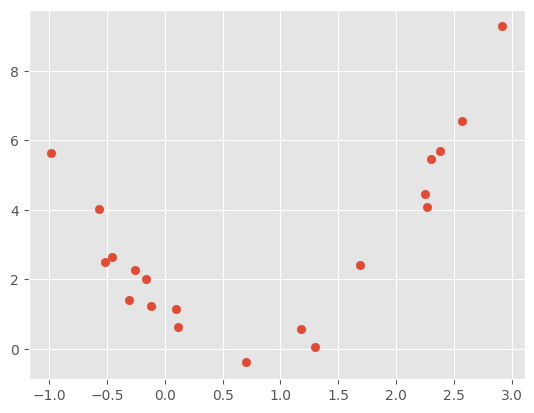

In [3]:
# generate data with N = 20
# this x, y data will be used as the training data
x, y = generate_poly_data(20, 0.5)
# plot x and y
plt.scatter(x, y)
plt.show()

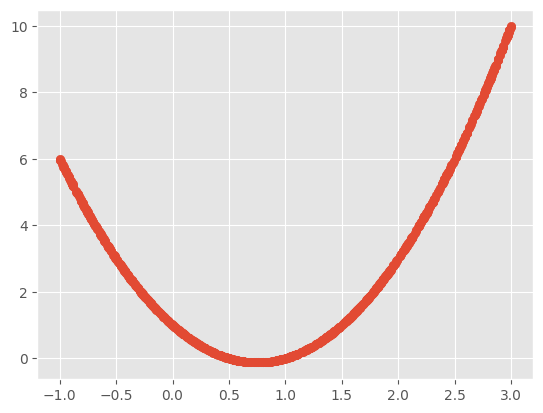

In [4]:
# Test Data
x_test = np.random.uniform(low = -1, high = 3, size = 1000)
y_test = np.array([2 * i ** 2 - 3 * i + 1 for i in x_test])
plt.scatter(x_test, y_test)
plt.show()

In [5]:
# Linear Regression

class pytorchLR():
    def __init__(self, n_epochs = 100, weight_decay = 0, lr = 10e-3):
        self.n_epochs = n_epochs
        self.weight_decay = weight_decay
        self.lr = lr
    
    def fit(self, x, y):
        x = torch.tensor(x).float()
        y = torch.tensor(y).float()
        self.model = nn.Linear(x.shape[1], 1)
    
        # Define the loss
        loss = nn.MSELoss()

        # Define the optimizer SGD
        optimizer = torch.optim.SGD(params=self.model.parameters(), weight_decay=self.weight_decay, lr = self.lr)
        

        for epoch in range(self.n_epochs):
            # For this homework you are not required to partition the data in mini batches
            y_pred = self.model(x)
            l = loss(y_pred, y)

            # complete the training routine passing x through the network, computing the loss, calling the backpropagation, and computing a step with the optimizer
            optimizer.zero_grad()
            l.backward()

            optimizer.step()

    def predict(self, x):
        x = torch.tensor(x).float()
        y_hat = self.model(x)
        return y_hat.detach().cpu().numpy()

In [6]:
# create the model and fit it
model = pytorchLR(n_epochs=5000, weight_decay=0, lr=1e-3)
model.fit(x[:, None], y[:, None])

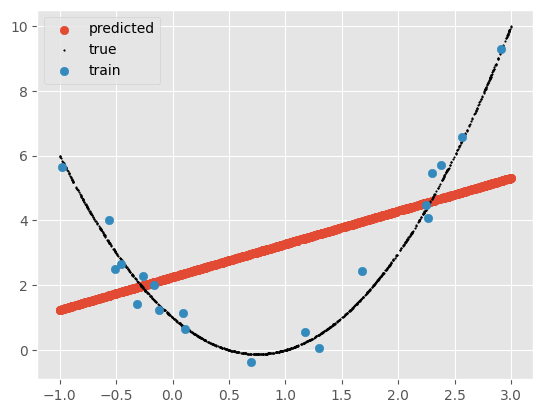

In [7]:
# Plot the predictions and the train data
y_hat = model.predict(x_test[:, None])
plt.scatter(x_test, y_hat, label="predicted")
plt.scatter(x_test, y_test, c = "black", s = 1, label="true")
plt.scatter(x, y, label="train")
plt.legend()
plt.show()

In [8]:
# initialize the new data
x_train2 = []
for val in x:
    x_train2.append([val, val**2])
x_train2 = np.array(x_train2)

x_test2 = []
for val in x_test:
    x_test2.append([val, val**2])
x_test2 = np.array(x_test2)

# create the model and fit it
model2 = pytorchLR(n_epochs=5000, weight_decay=0, lr=1e-3)
model2.fit(x_train2, y[:, None])

# Print the weights and biases
print("y = 2x^2 - 3x + 1")
print("true: a = 2, b = -3, c = 1")
print(f"model: a = {model2.model.weight.data[0][1]}, b = {model2.model.weight.data[0][0]}, c = {model2.model.bias.data[0]}")

y = 2x^2 - 3x + 1
true: a = 2, b = -3, c = 1
model: a = 1.7574985027313232, b = -2.392350435256958, c = 1.1468772888183594


In [9]:
# create the model and fit it with 4x the number of epochs to compare
model2b = pytorchLR(n_epochs=20000, weight_decay=0, lr=1e-3)
model2b.fit(x_train2, y[:, None])

# Print the weights and biases
print("By quadrupling the number of epochs, the model fit improves")
print("y = 2x^2 - 3x + 1")
print("true: a = 2, b = -3, c = 1")
print(f"model: a = {model2b.model.weight.data[0][1]}, b = {model2b.model.weight.data[0][0]}, c = {model2b.model.bias.data[0]}")

By quadrupling the number of epochs, the model fit improves
y = 2x^2 - 3x + 1
true: a = 2, b = -3, c = 1
model: a = 1.9646676778793335, b = -2.845712661743164, c = 1.036564826965332


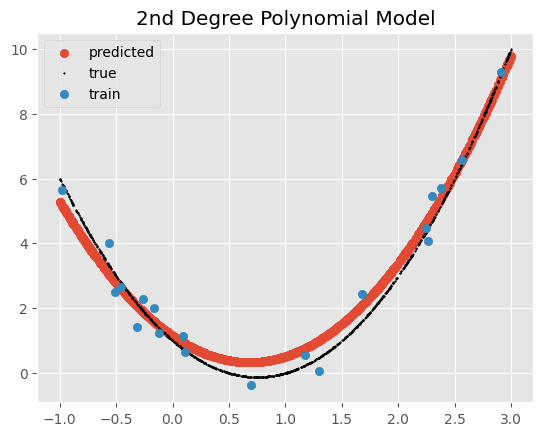

In [10]:
# Plot the predictions and the train data
y_hat2 = model2.predict(x_test2)
plt.title("2nd Degree Polynomial Model")
plt.scatter(x_test, y_hat2, label="predicted")
plt.scatter(x_test, y_test, c = "black", s = 1, label="true")
plt.scatter(x, y, label="train")
plt.legend()
plt.show()

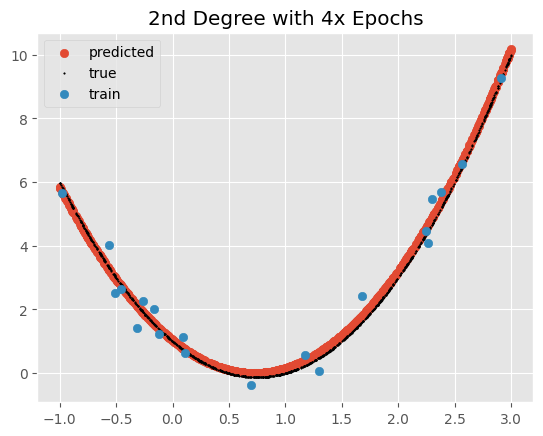

In [11]:
# Plot the predictions and the train data for the model with extra epochs
y_hat2b = model2b.predict(x_test2)
plt.title("2nd Degree with 4x Epochs")
plt.scatter(x_test, y_hat2b, label="predicted")
plt.scatter(x_test, y_test, c = "black", s = 1, label="true")
plt.scatter(x, y, label="train")
plt.legend()
plt.show()

In [12]:
# initialize the new data for 5th degree
x_train5 = []
for val in x:
    x_train5.append([val, val**2, val**3, val**4, val**5])
x_train5 = np.array(x_train5)

x_test5 = []
for val in x_test:
    x_test5.append([val, val**2, val**3, val**4, val**5])
x_test5 = np.array(x_test5)

# create the model and fit it
model5 = pytorchLR(n_epochs=25000, weight_decay=0, lr=2.2e-4)
model5.fit(x_train5, y[:, None])

# display coefficients
print("y = 2x^2 - 3x + 1")
print("true: a = 2, b = -3, c = 1")
print("model: ax^5 + bx^4 + cx^3 + dx^2 + ex + f")
print(f"model: a = {model5.model.weight.data[0][4]}, b = {model5.model.weight.data[0][3]}, c = {model5.model.weight.data[0][2]}, d = {model5.model.weight.data[0][1]}, e = {model5.model.weight.data[0][0]}, f = {model5.model.bias.data[0]} ")

y = 2x^2 - 3x + 1
true: a = 2, b = -3, c = 1
model: ax^5 + bx^4 + cx^3 + dx^2 + ex + f
model: a = -0.21155528724193573, b = 1.0182875394821167, c = -0.8575419783592224, d = 0.572645366191864, e = -1.7040518522262573, f = 1.4354548454284668 


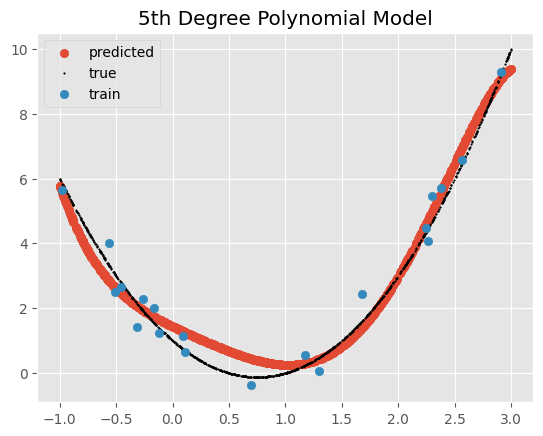

In [13]:
# Plot the predictions and the train data
y_hat5 = model5.predict(x_test5)
plt.title("5th Degree Polynomial Model")
plt.scatter(x_test, y_hat5, label="predicted")
plt.scatter(x_test, y_test, c = "black", s = 1, label="true")
plt.scatter(x, y, label="train")
plt.legend()
plt.show()

Sigma=0.1, N=15, wd=0: MSE=0.4965
Sigma=0.1, N=15, wd=0.2: MSE=0.69441
Sigma=0.1, N=15, wd=0.5: MSE=0.6545
Sigma=0.1, N=100, wd=0: MSE=0.58906
Sigma=0.1, N=100, wd=0.2: MSE=0.88019
Sigma=0.1, N=100, wd=0.5: MSE=1.02577
Sigma=0.5, N=15, wd=0: MSE=0.70749
Sigma=0.5, N=15, wd=0.2: MSE=0.73085
Sigma=0.5, N=15, wd=0.5: MSE=0.86316
Sigma=0.5, N=100, wd=0: MSE=0.70725
Sigma=0.5, N=100, wd=0.2: MSE=0.94599
Sigma=0.5, N=100, wd=0.5: MSE=1.15328
Sigma=1, N=15, wd=0: MSE=1.30378
Sigma=1, N=15, wd=0.2: MSE=1.49856
Sigma=1, N=15, wd=0.5: MSE=1.44769
Sigma=1, N=100, wd=0: MSE=0.62906
Sigma=1, N=100, wd=0.2: MSE=0.95575
Sigma=1, N=100, wd=0.5: MSE=1.06352
Best Performer: s=0.1, N=15, wd=0: MSE=0.4965039789676666


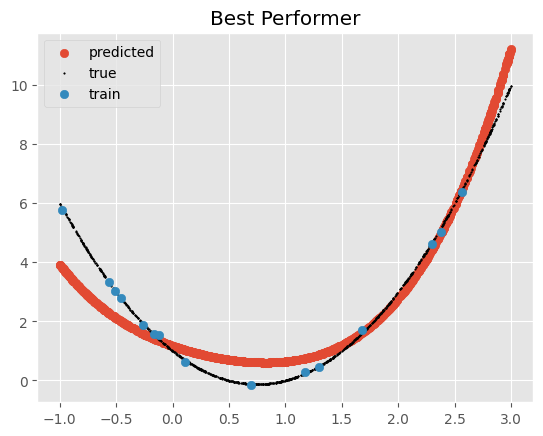

In [14]:
import math
# Testing different sigma and N values on a 5th degree model
sigmas = [0.1, 0.5, 1]
Ns = [15, 100]
weight_decays = [0, 0.2, 0.5]

results = []
minMSE= math.inf
minParams = []
err = nn.MSELoss()
for sig in sigmas:
    for n in Ns:
        x_sn1, y_sn = generate_poly_data(n, sig)
        i_vals = []
        for i in x_sn1:
            i_vals.append([i, i**2, i**3, i**4, i**5])
        x_sn = np.array(i_vals)
        for weight in weight_decays:
            model = pytorchLR(n_epochs=10000, lr=1.0e-4, weight_decay=weight)
            model.fit(x_sn, y_sn[:, None])
            y_hat = model.predict(x_test5)
            loss = float(err(torch.tensor(y_hat).float(), torch.tensor(y_test[:, None]).float()))
            results.append(loss)
            if loss < minMSE:
                minMSE = loss
                minParams = [sig, n, weight, x_sn1, y_sn, y_hat]
            print(f"Sigma={sig}, N={n}, wd={weight}: MSE={round(loss, 5)}")

print(f"Best Performer: s={minParams[0]}, N={minParams[1]}, wd={minParams[2]}: MSE={minMSE}")
plt.title("Best Performer")
plt.scatter(x_test, minParams[-1], label="predicted")
plt.scatter(x_test, y_test, c = "black", s = 1, label="true")
plt.scatter(minParams[3], minParams[4], label="train")
plt.legend()
plt.show()